In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import stats
%matplotlib inline

In [3]:
times, metrics = pickle.load(open('data/run_result.pkl', 'r'))

In [4]:
times = np.array(times)
metrics = np.array(metrics)
print 'seed, method, iter'
print times.shape
print metrics.shape

seed, method, iter
(10, 5, 4)
(10, 5, 4)


In [5]:
labels = ['pb', 'stan', 'prism', 'tm-gibbs', 'tm-vem']

In [6]:
times_metrics = {labels[i]:(times[:,i,:], metrics[:,i,:]) for i in range(5)}

In [7]:
times_metrics['pb'][0].shape

(10, 4)

In [8]:
for k,v in times_metrics.iteritems():
    print k
    print np.average(v[0], axis=0)
    print np.std(v[0], axis=0)
    print np.average(v[1], axis=0)
    print np.std(v[1], axis=0)

pb
[  46.63011296   85.47033861  124.12597418  163.28188794]
[ 2.87711494  5.01849487  6.29533374  7.48588013]
[-239409.78149046 -209608.88189223 -199766.77240726 -198245.59624431]
[ 4561.40603674  5164.06177496  3798.49171832  2060.2210471 ]
stan
[  42.73691273   87.31041589  193.47301047  493.61230607]
[   3.22922385   31.85694635  101.71124377  115.00087568]
[-359001.80906083 -348160.63798204 -339299.92158139 -334879.2993493 ]
[ 1939.57830782  2608.05467974  3069.22029798   306.27246387]
prism
[ 2.97478302  3.68106649  4.55082023  5.23654292]
[ 0.15328967  0.15249829  0.26224263  0.15318483]
[-318561.9 -315950.6 -315781.1 -315692.8]
[ 484.70639567  338.60011813  311.42621919  314.82083794]
tm-gibbs
[ 0.74482939  1.04496837  1.32741439  1.61226728]
[ 0.02932603  0.04981816  0.03169597  0.03484137]
[-259417.12794208 -213641.98258599 -203580.52238531 -198355.16376672]
[ 3261.52684462  6475.45621006  5420.56451532  2719.93796036]
tm-vem
[  5.99620683   7.32971108   8.81279302  10.340475

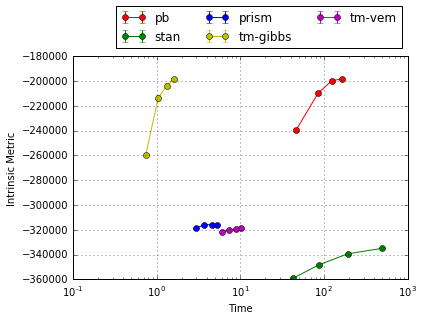

In [9]:
plt.xlabel('Time')
plt.ylabel('Intrinsic Metric')
plt.grid()
colors = ['r', 'g', 'b', 'y', 'm']
for c, (k,v) in zip(colors, times_metrics.iteritems()):
    x = np.average(v[0], axis=0)
    #print x.shape
    y = np.average(v[1], axis=0)
    y_err = stats.sem(v[1])
    #print y_err.shape
    #plt.semilogx(x, y, color=c, label=k)
    #plt.fill_between(x, y-y_err, y+y_err, color=c, alpha=0.3)
    plt.errorbar(x,y, yerr = y_err, color=c, label=k, marker='o')
    plt.xscale("log")
lgd = plt.legend(ncol=3, bbox_to_anchor=(1, 1.25))
plt.savefig('data/lls.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')